Shampoo Sales Dataset


This dataset describes the monthly number of sales of shampoo over a 3 year period.

The units are a sales count and there are 36 observations. 

In [1]:
##Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vinodbarel","key":"20d0e66677df8bd148f305efd1611985"}'}

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle dataset list


usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')


In [6]:
!kaggle datasets download -d shenba/time-series-datasets

  0% 0.00/19.2k [00:00<?, ?B/s]
100% 19.2k/19.2k [00:00<00:00, 9.22MB/s]


In [7]:
!unzip time-series-datasets.zip

Archive:  time-series-datasets.zip
  inflating: Electric_Production.csv  
  inflating: daily-minimum-temperatures-in-me.csv  
  inflating: monthly-beer-production-in-austr.csv  
  inflating: sales-of-shampoo-over-a-three-ye.csv  


In [8]:
# #Creating pandas df
data = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv')

In [9]:
data.head()

,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


In [10]:
data['Sales']=data['Sales of shampoo over a three year period'].astype(float)

In [11]:
data.tail()

,Month,Sales of shampoo over a three year period,Sales
31,3-Aug,407.6,407.6
32,3-Sep,682.0,682.0
33,3-Oct,475.3,475.3
34,3-Nov,581.3,581.3
35,3-Dec,646.9,646.9


In [12]:
#data.drop('Sales of shampoo over a three year period')
data = data.drop(['Sales of shampoo over a three year period'], axis=1)


In [13]:
data.shape

(36, 2)

Data refers from Jan 2019 to Dec 2021. It’’s a monthly sales data. Creating monthly dates for timestamp from Jan 2019 to Dec 2021.

In [14]:
date = pd.date_range(start='1/1/2019', end='12/31/2021', freq='M')
date

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [15]:
data['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
data.head()


,Month,Sales,Time_Stamp
0,1-Jan,266.0,2019-01-31
1,1-Feb,145.9,2019-02-28
2,1-Mar,183.1,2019-03-31
3,1-Apr,119.3,2019-04-30
4,1-May,180.3,2019-05-31


In [16]:
data.tail()

,Month,Sales,Time_Stamp
31,3-Aug,407.6,2021-08-31
32,3-Sep,682.0,2021-09-30
33,3-Oct,475.3,2021-10-31
34,3-Nov,581.3,2021-11-30
35,3-Dec,646.9,2021-12-31


In [17]:
data.tail()

,Month,Sales,Time_Stamp
31,3-Aug,407.6,2021-08-31
32,3-Sep,682.0,2021-09-30
33,3-Oct,475.3,2021-10-31
34,3-Nov,581.3,2021-11-30
35,3-Dec,646.9,2021-12-31


In [18]:
data = data.set_index('Time_Stamp')
data.head()

,Month,Sales
Time_Stamp,,
2019-01-31,1-Jan,266.0
2019-02-28,1-Feb,145.9
2019-03-31,1-Mar,183.1
2019-04-30,1-Apr,119.3
2019-05-31,1-May,180.3


In [19]:
df_final = data.drop(['Month'], axis=1)
df_final.head()

,Sales
Time_Stamp,
2019-01-31,266.0
2019-02-28,145.9
2019-03-31,183.1
2019-04-30,119.3
2019-05-31,180.3


## Plotting the time-series

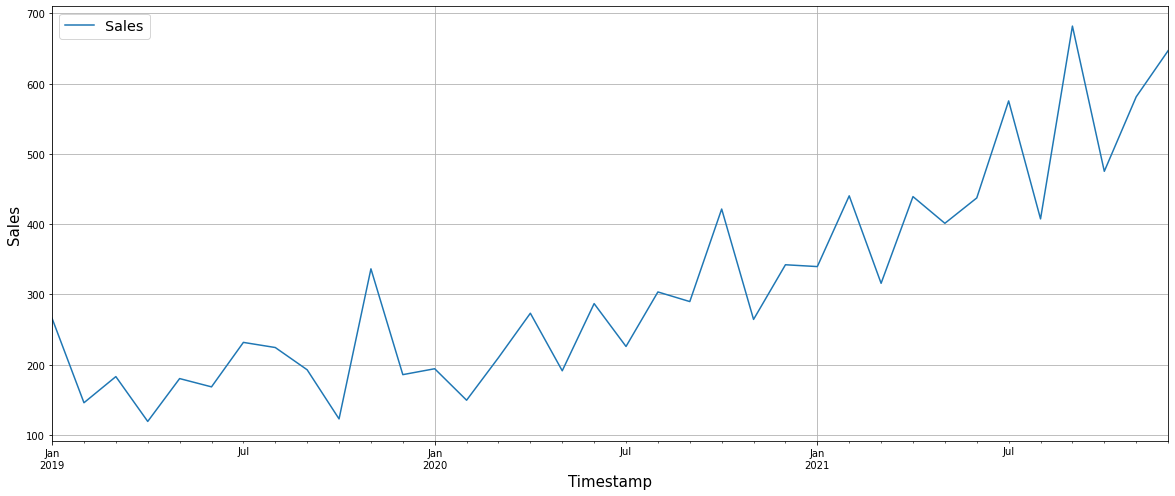

In [20]:
#Plotting the time-series
df_final.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

There seems to be a trend (increasing) with a seasonality as well.

## Checking for missing values

In [21]:
df_final.isnull().sum()

Sales    0
dtype: int64

# 2. Exploratory Data Analysis

## Statistical Description

In [22]:
round(df_final.describe(),3)

,Sales
count,36.000
mean,312.600
std,148.937
min,119.300
25%,192.450
50%,280.150
75%,411.100
max,682.000


Sales of shampoo ranges from 119.3 unit to 682 unit, hinting huge variation in sales across months.

Mean sales is 312.6



## Yearly Boxplot

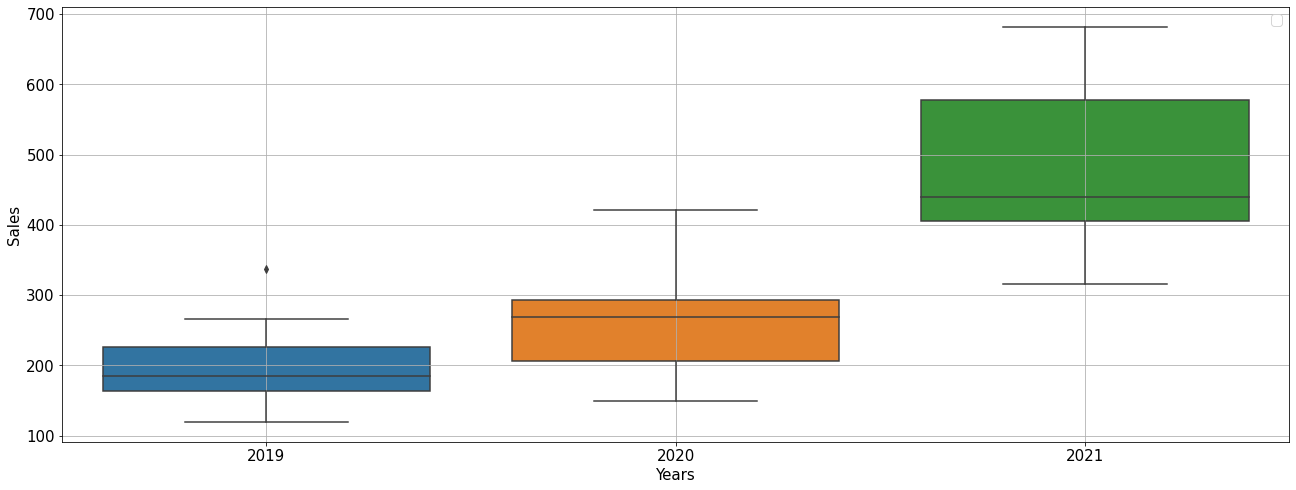

In [23]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_final.index.year,y = df_final.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Above plot suggests that series has a significant trend. Every year sales is increasing.



## Monthly Boxplot

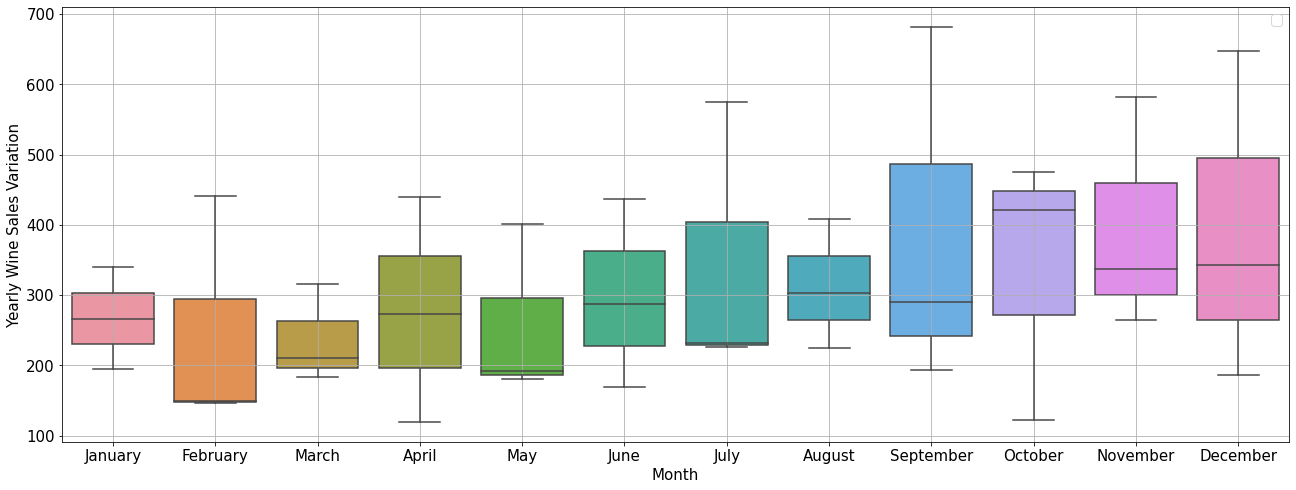

In [24]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_final.index.month_name(),y = df_final.values[:,0],ax=ax)

plt.grid();
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Wine Sales Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

It appears that we have a seasonal component each year. 

Also, we see that there are no outliers present.


## Monthly sales across years

In [25]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
monthly_sales_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2019,119.3,224.5,185.9,145.9,266.0,231.8,168.5,183.1,180.3,336.5,122.9,192.8
2020,273.3,303.6,342.3,149.5,194.3,226.0,287.0,210.1,191.4,264.5,421.6,289.9
2021,439.3,407.6,646.9,440.4,339.7,575.5,437.4,315.9,401.3,581.3,475.3,682.0


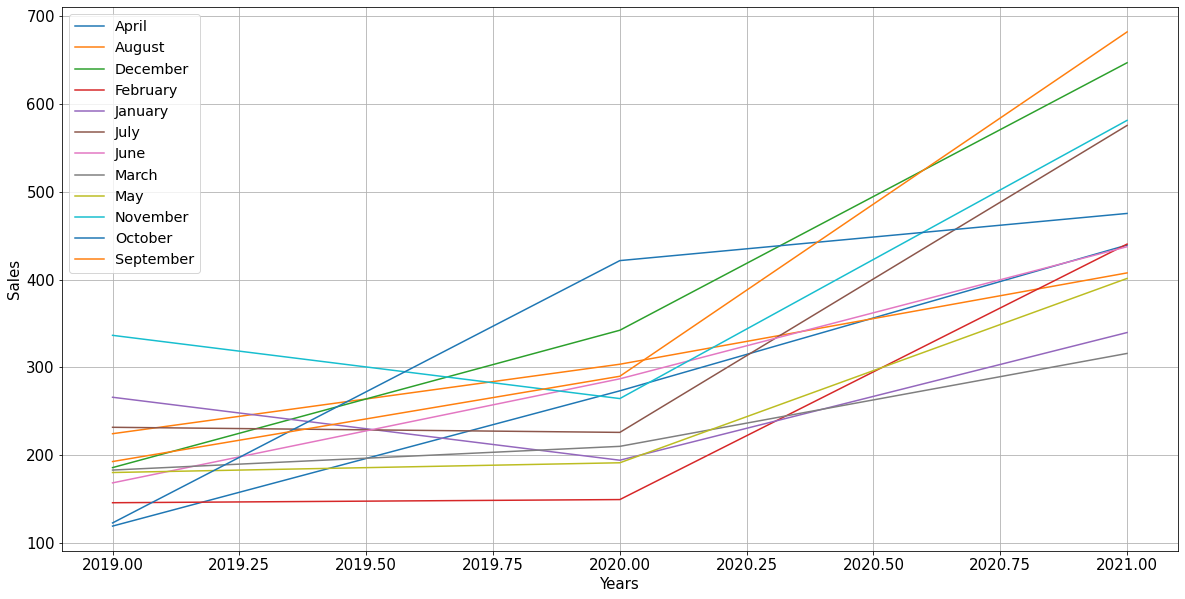

In [26]:
monthly_sales_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.xlabel('Years',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Till 2020 there is no significant trend, but from 2020 to 2021 there is a significant trend seen.



## Quarterly sales across years

In [27]:
quarterly_turnover = pd.pivot_table(df_final, values = "Sales", columns = df_final.index.quarter, index = df_final.index.year)
quarterly_turnover



Time_Stamp,1,2,3,4
Time_Stamp,,,,
2019,198.333333,156.033333,216.366667,215.100000
2020,184.633333,250.566667,273.166667,342.800000
2021,365.333333,426.000000,555.033333,567.833333


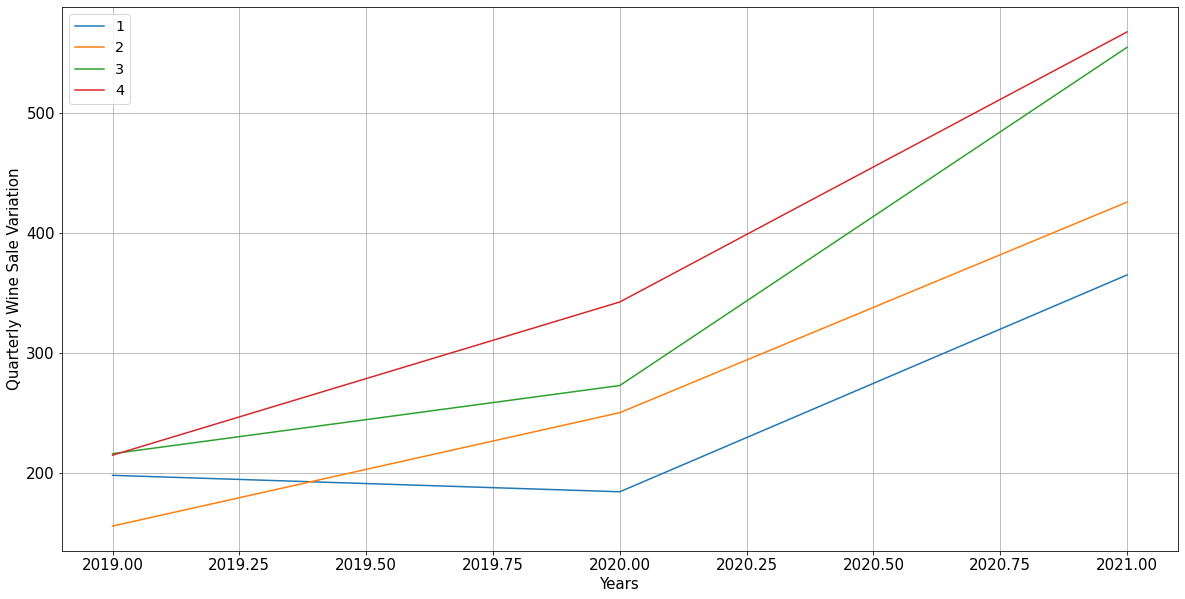

In [28]:
quarterly_turnover.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

plt.xlabel('Years',fontsize=15)
plt.ylabel('Quarterly Wine Sale Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

As seen from the above plot, Q4 has the highest sales. After that Q3. Q1 and Q2 have lowest sales.

## Plotting the time series monthplot to understand the spread of sales across different years and within different months across years.

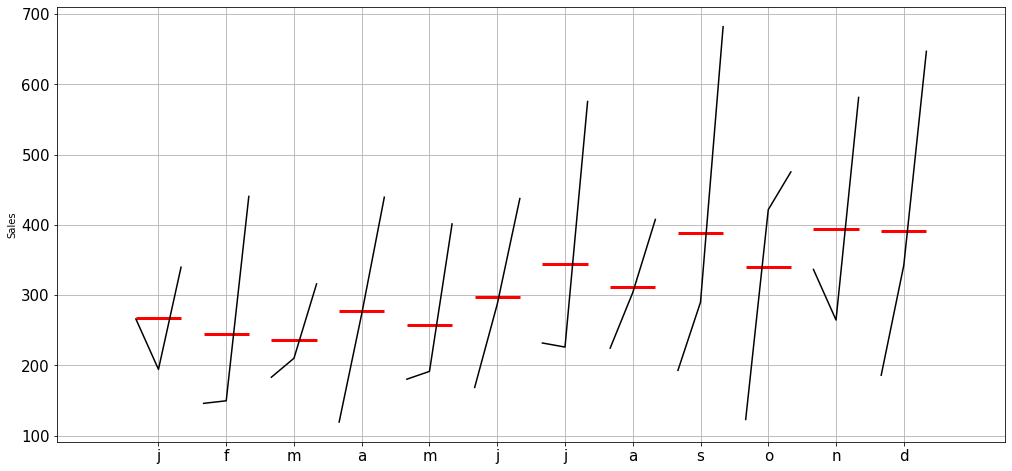

In [29]:
from pylab import rcParams

rcParams['figure.figsize'] =17,8

from statsmodels.graphics.tsaplots import month_plot
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
month_plot(df_final['Sales'],ylabel='Sales')
plt.grid();

For most of the months sales for a month is significantly increasing in the next year.

## Plotting the Empirical Cumulative Distribution.

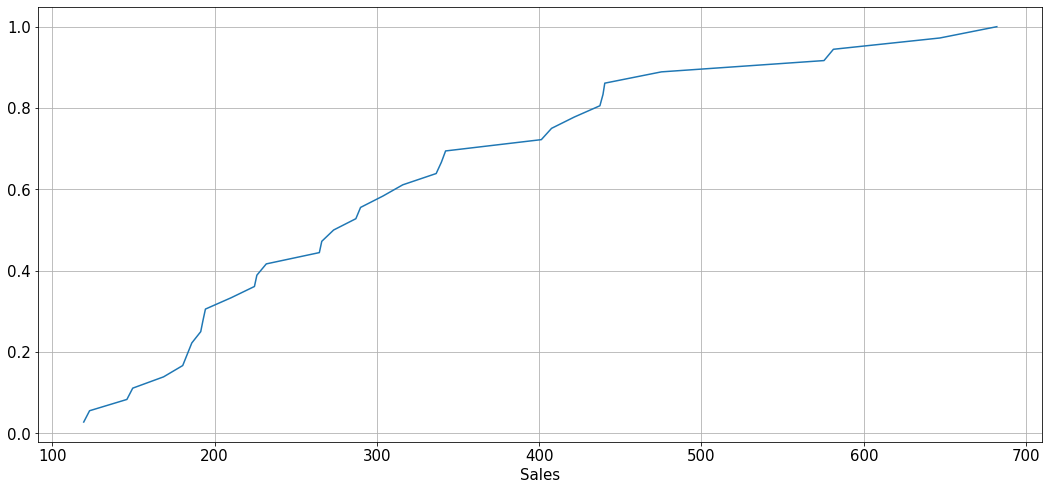

In [30]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_final['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Sales', fontsize = 15);

Around 60% of all the months had 300 unit or lesser sales.

Around 50% of all the months had 450 unit or lesser sales.


## Plot the average sales per month and the month on month percentage change of sales.

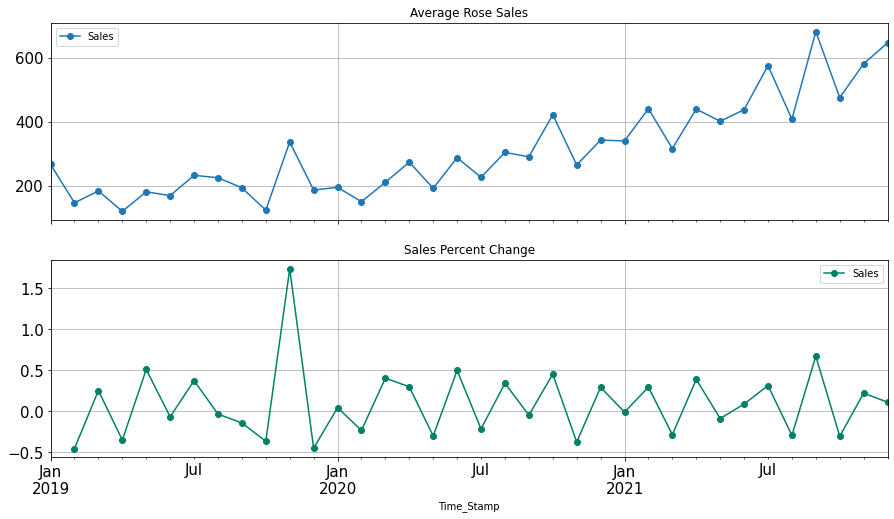

In [31]:
# group by date and get average Customers, and precent change
average    = df_final.groupby(df_final.index)["Sales"].mean()
pct_change = df_final.groupby(df_final.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Customers over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

There is huge percentage change in sales after every month.

## Plot sales for every year

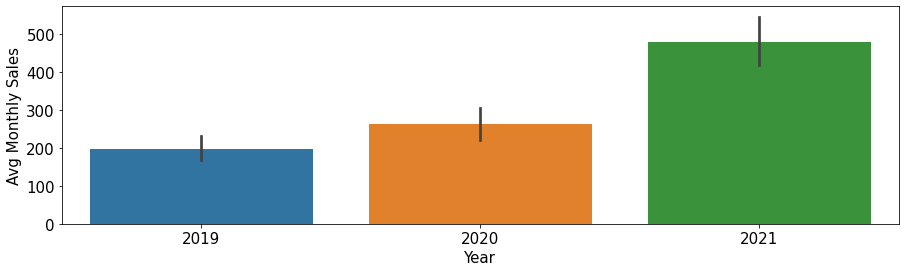

In [32]:
## Plot sales for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df_final.index.year, y=df_final.values[:,0], data=df_final, ax=axis1);
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Year', fontsize = 15);
plt.ylabel('Avg Monthly Sales', fontsize = 15);

It can be seen that, the average monthly sales increases as we move from 2019 to 2021.

## Yearly Total Sales

In [33]:
monthly_sales_across_years = pd.pivot_table(df_final, values = 'Sales', columns = df_final.index.month_name(), index = df_final.index.year)
yearly_total_sales = monthly_sales_across_years.sum(axis = 1, skipna = True) 
yearly_total_sales


Time_Stamp
2019    2357.5
2020    3153.5
2021    5742.6
dtype: float64

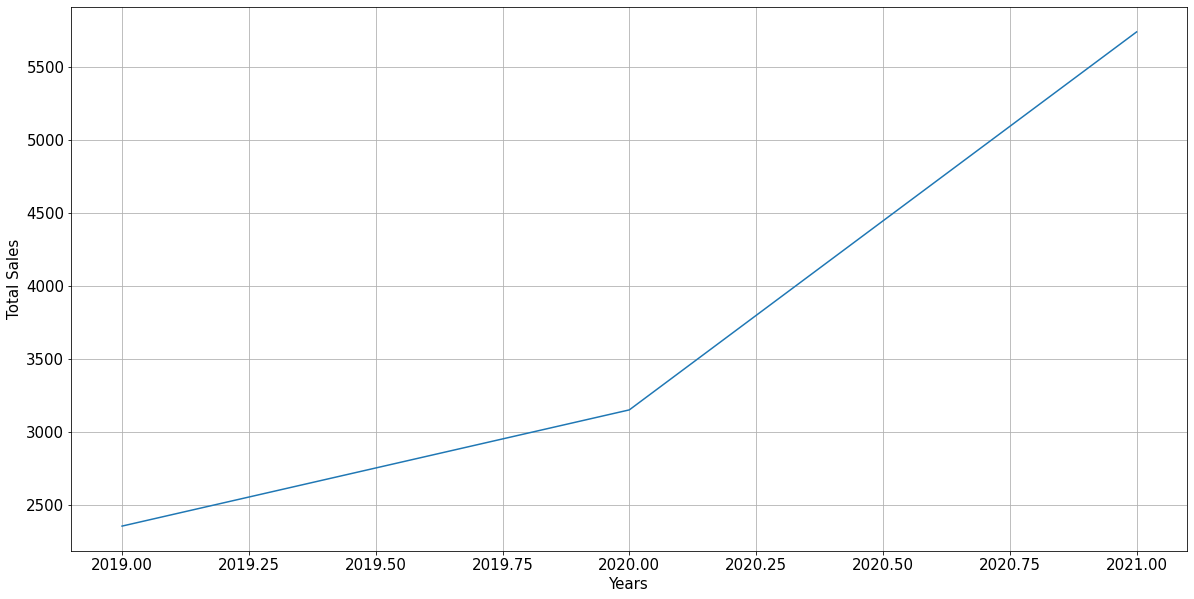

In [34]:
yearly_total_sales.plot(figsize=(20,10))
plt.grid()

plt.xlabel('Years',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)


As it can be seen that total sales every year sales is increasing. 

# 3. Decomposing the Time Series and plotting the different components.

### Assuming additive decomposition

In [35]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

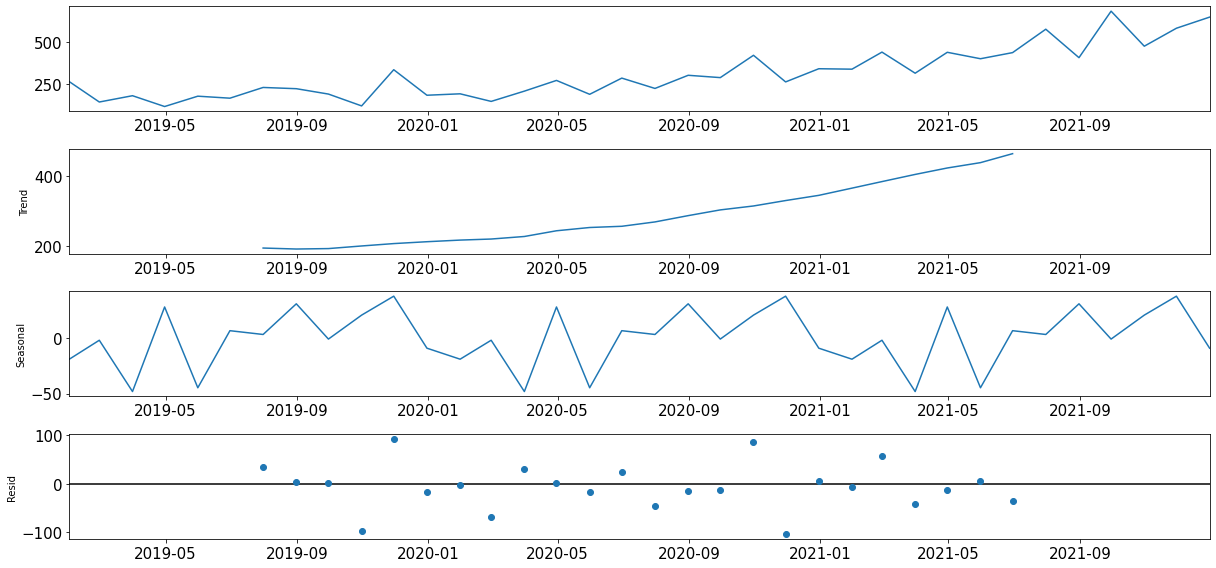

In [36]:
decomposition = seasonal_decompose(df_final,model='additive')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16


### Assuming multiplicative decomposition

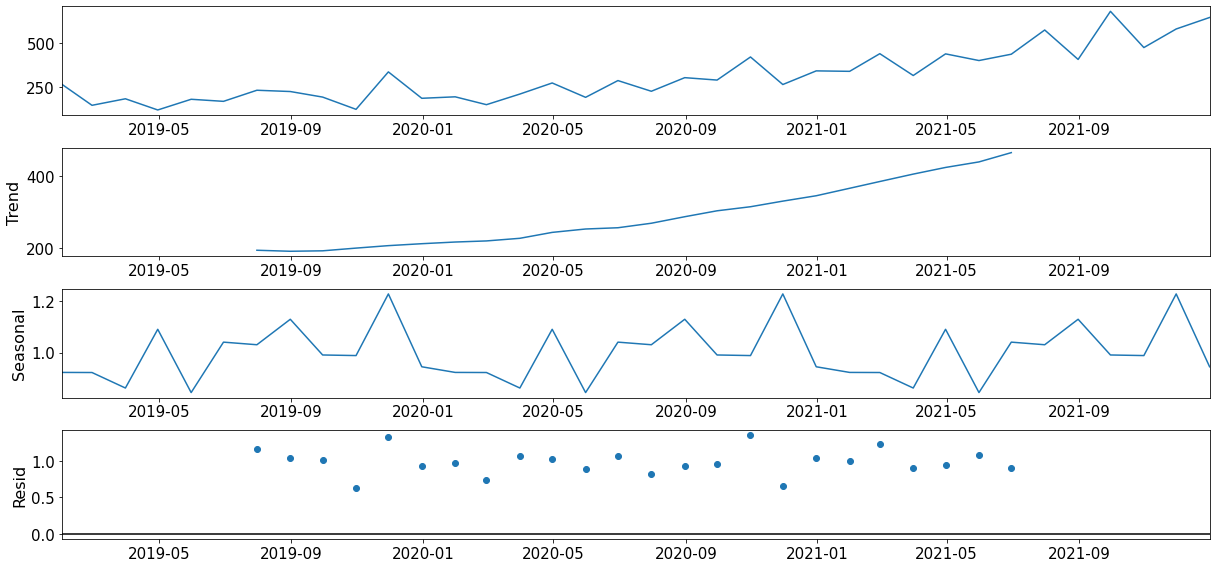

In [37]:
decomposition = seasonal_decompose(df_final,model='multiplicative')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

In multiplicative model, We observe that the trend and seasonality are clearly separated and scale of noise is small. In the additive model, there are outliers present in the residual. So series is multiplicative. 

In [38]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2019-01-31           NaN
2019-02-28           NaN
2019-03-31           NaN
2019-04-30           NaN
2019-05-31           NaN
2019-06-30           NaN
2019-07-31    193.470833
2019-08-31    190.633333
2019-09-30    191.908333
2019-10-31    199.450000
2019-11-30    206.329167
2019-12-31    211.729167
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2019-01-31    0.922913
2019-02-28    0.922549
2019-03-31    0.861982
2019-04-30    1.091374
2019-05-31    0.844236
2019-06-30    1.041187
2019-07-31    1.031036
2019-08-31    1.130490
2019-09-30    0.991044
2019-10-31    0.988744
2019-11-30    1.229457
2019-12-31    0.944987
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2019-01-31         NaN
2019-02-28         NaN
2019-03-31         NaN
2019-04-30         NaN
2019-05-31         NaN
2019-06-30         NaN
2019-07-31    1.162048
2019-08-31    1.041720
2019-09-30    1.013725
2019-10-31    0.623209
2019-11-30    1.326511
2019-12-31    0.929123
Name: resid, dtype:

In [39]:
# 4. Splitting the data into training and test. 70:30

In [41]:
train    =   df_final[0:int(len(data)*0.7)] 
test     =   df_final[int(len(data)*0.7):]

In [42]:
train.shape

(25, 1)

In [43]:
train.tail()

,Sales
Time_Stamp,
2020-09-30,289.9
2020-10-31,421.6
2020-11-30,264.5
2020-12-31,342.3
2021-01-31,339.7


In [44]:
test.shape

(11, 1)

In [45]:
test.head()

,Sales
Time_Stamp,
2021-02-28,440.4
2021-03-31,315.9
2021-04-30,439.3
2021-05-31,401.3
2021-06-30,437.4


# 5. Building various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. 

## Model 1: Linear Regression

For this particular linear regression, we are going to regress the 'Sales' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [47]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+26 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
Test Time instance 
 [26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [48]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [49]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sales  time
Time_Stamp             
2019-01-31  266.0     1
2019-02-28  145.9     2
2019-03-31  183.1     3
2019-04-30  119.3     4
2019-05-31  180.3     5 

Last few rows of Training Data 
             Sales  time
Time_Stamp             
2020-09-30  289.9    21
2020-10-31  421.6    22
2020-11-30  264.5    23
2020-12-31  342.3    24
2021-01-31  339.7    25 

First few rows of Test Data 
             Sales  time
Time_Stamp             
2021-02-28  440.4    26
2021-03-31  315.9    27
2021-04-30  439.3    28
2021-05-31  401.3    29
2021-06-30  437.4    30 

Last few rows of Test Data 
             Sales  time
Time_Stamp             
2021-08-31  407.6    32
2021-09-30  682.0    33
2021-10-31  475.3    34
2021-11-30  581.3    35
2021-12-31  646.9    36 



Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sales'].values)

LinearRegression()

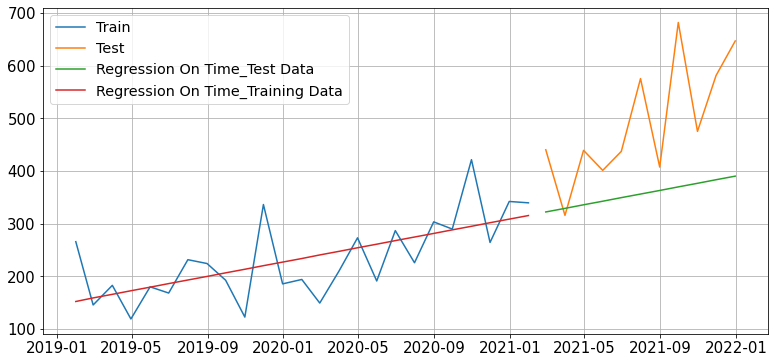

In [53]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [54]:
from sklearn import metrics

In [55]:
## Mean Absolute Percentage Error - Function Definition

def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

### Model1 Evaluation (Linear Regression)

In [56]:
## Training Data - RMSE and MAPE

rmse_model1_train = metrics.mean_squared_error(train['Sales'],train_predictions_model1,squared=False)
mape_model1_train = MAPE(train['Sales'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 56.962 MAPE is 19.00


In [57]:
## Test Data - RMSE and MAPE

rmse_model1_test = metrics.mean_squared_error(test['Sales'],test_predictions_model1,squared=False)
mape_model1_test = MAPE(test['Sales'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 164.563 MAPE is 27.94


In [58]:
resultsDf = pd.DataFrame({'Model': 'RegressionOnTime',
                                                    'Test RMSE': [rmse_model1_test],
                          'Test MAPE': [mape_model1_test]},
                         index=['Model 1'])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [59]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [60]:
## Let us get the last value (or the most recent value) of the training set.

NaiveModel_train['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_train['naive'].head()

Time_Stamp
2019-01-31    339.7
2019-02-28    339.7
2019-03-31    339.7
2019-04-30    339.7
2019-05-31    339.7
Name: naive, dtype: float64

In [61]:
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
2021-02-28    339.7
2021-03-31    339.7
2021-04-30    339.7
2021-05-31    339.7
2021-06-30    339.7
Name: naive, dtype: float64

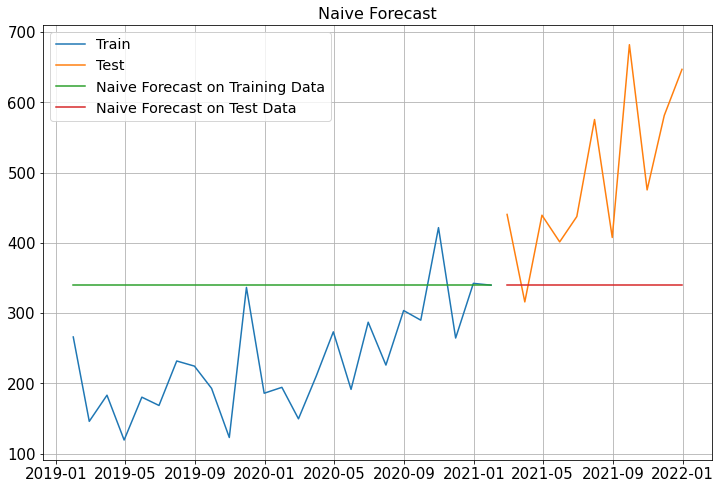

In [62]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_train['naive'], label='Naive Forecast on Training Data')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

### Model2 Evaluation (Naive Approach)

In [63]:
## Training Data - RMSE and MAPE

rmse_model2_train = metrics.mean_squared_error(train['Sales'],NaiveModel_train['naive'],squared=False)
mape_model2_train = MAPE(train['Sales'],NaiveModel_train['naive'])
print("For Naive Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_train, mape_model2_train))

For Naive Model forecast on the Training Data,  RMSE is 129.667 MAPE is 48.04


In [64]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Sales'],NaiveModel_test['naive'],squared=False)
mape_model2_test = MAPE(test['Sales'],NaiveModel_test['naive'])
print("For Naive Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For Naive Model forecast on the Test Data,  RMSE is 186.469 MAPE is 31.72


In [65]:
resultsDf_2 = pd.DataFrame({'Model': 'NaiveModel', 
                                                      
                            'Test RMSE': [rmse_model2_test],
                            'Test MAPE': [mape_model2_test]},index=['Model 2'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72


## Model 3: Simple Average

For this particular simple average method, we will forecast by using the average of the training values.

In [66]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [67]:
## Let us get the average of  the training set.

SimpleAverage_train['mean_forecast'] = train['Sales'].mean()
SimpleAverage_train.head()

,Sales,mean_forecast
Time_Stamp,,
2019-01-31,266.0,234.028
2019-02-28,145.9,234.028
2019-03-31,183.1,234.028
2019-04-30,119.3,234.028
2019-05-31,180.3,234.028


In [68]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

,Sales,mean_forecast
Time_Stamp,,
2021-02-28,440.4,234.028
2021-03-31,315.9,234.028
2021-04-30,439.3,234.028
2021-05-31,401.3,234.028
2021-06-30,437.4,234.028


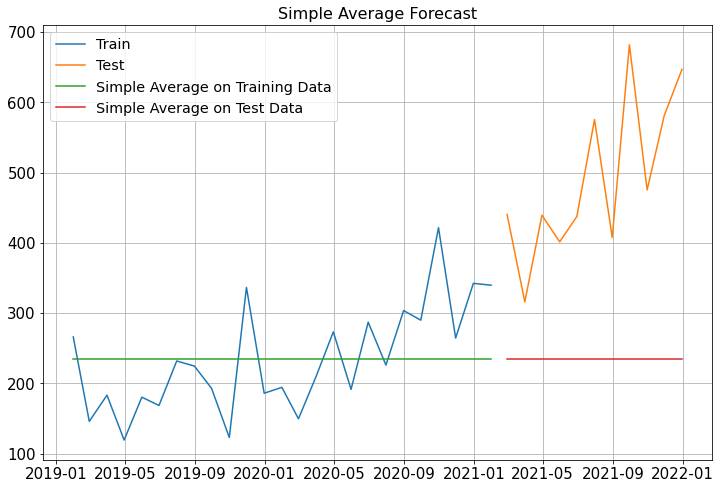

In [69]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_train['mean_forecast'], label='Simple Average on Training Data')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(fontsize="x-large")
plt.grid();

### Model3 Evaluation (Simple Average)

In [70]:
## Training Data - RMSE and MAPE

rmse_model3_train = metrics.mean_squared_error(train['Sales'],SimpleAverage_train['mean_forecast'],squared=False)
mape_model3_train = MAPE(train['Sales'],SimpleAverage_train['mean_forecast'])
print("For Simple Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_train, mape_model3_train))

For Simple Average Model forecast on the Training Data,  RMSE is 75.147 MAPE is 26.80


In [71]:
## Test Data - RMSE and MAPE

rmse_model3_test = metrics.mean_squared_error(test['Sales'],SimpleAverage_test['mean_forecast'],squared=False)
mape_model3_test = MAPE(test['Sales'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 279.196 MAPE is 52.35


In [72]:
resultsDf_3 = pd.DataFrame({'Model': 'SimpleAverage', 
                            
                            'Test RMSE': [rmse_model3_test],
                            'Test MAPE': [mape_model3_test]}
                           ,index=['Model 3'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35


## Model 4: Moving Average(MA)

For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

For Moving Average, we are going to average over the entire data.

In [73]:
MovingAverage = df_final.copy()
MovingAverage.head()

,Sales
Time_Stamp,
2019-01-31,266.0
2019-02-28,145.9
2019-03-31,183.1
2019-04-30,119.3
2019-05-31,180.3


In [74]:

MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.head()

,Sales,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
2019-01-31,266.0,NaN,NaN,NaN,NaN
2019-02-28,145.9,205.95,NaN,NaN,NaN
2019-03-31,183.1,164.50,NaN,NaN,NaN
2019-04-30,119.3,151.20,178.575,NaN,NaN
2019-05-31,180.3,149.80,157.150,NaN,NaN


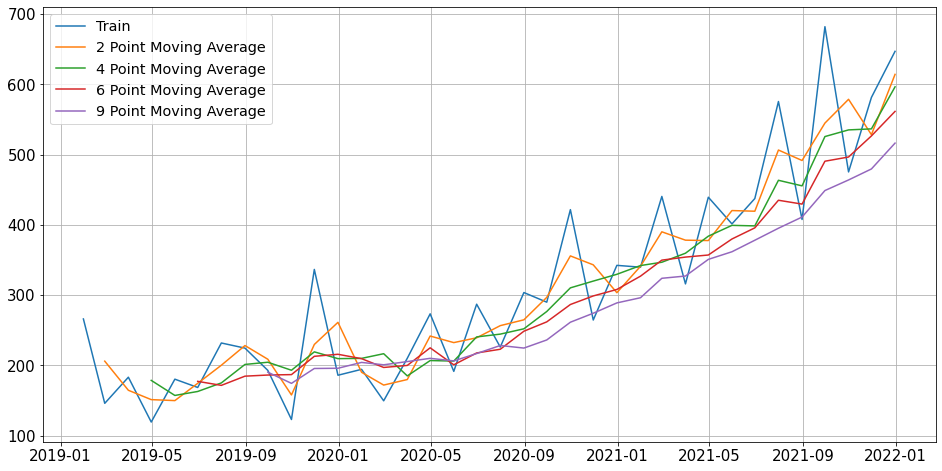

In [75]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid();

In [77]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(data)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(data)*0.7):]

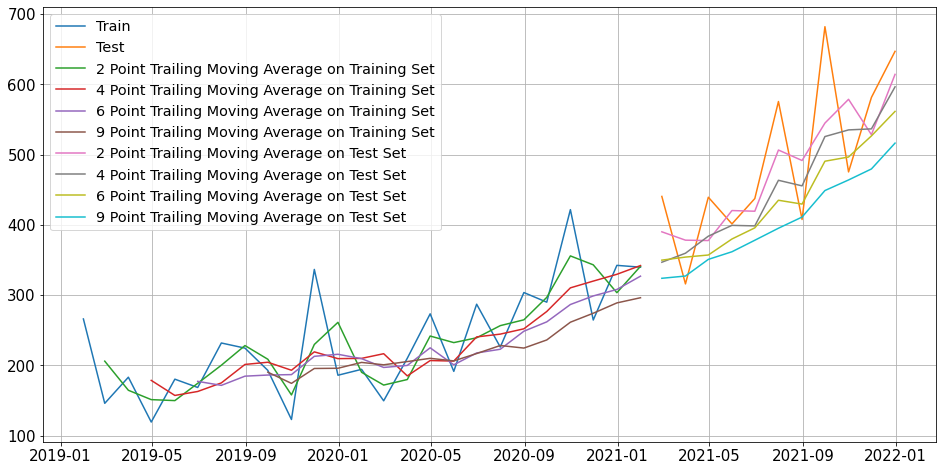

In [78]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid();

### Model 4 Evaluation (Moving Average)

In [79]:
## Test Data - RMSE and MAPE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_2'],squared=False)
mape_model4_test_2 = MAPE(test['Sales'],trailing_MovingAverage_test['Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_2, mape_model4_test_2))

## Test Data - RMSE and MAPE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_4'],squared=False)
mape_model4_test_4 = MAPE(test['Sales'],trailing_MovingAverage_test['Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_4, mape_model4_test_4))

## Test Data - RMSE and MAPE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_6'],squared=False)
mape_model4_test_6 = MAPE(test['Sales'],trailing_MovingAverage_test['Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_6, mape_model4_test_6))

## Test Data - RMSE and MAPE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sales'],trailing_MovingAverage_test['Trailing_9'],squared=False)
mape_model4_test_9 = MAPE(test['Sales'],trailing_MovingAverage_test['Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model4_test_9, mape_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 71.420 MAPE is 12.78
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 75.514 MAPE is 13.05
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 88.576 MAPE is 14.62
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 113.260 MAPE is 18.07


In [80]:

resultsDf_4 = pd.DataFrame({'Model': ['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'],    
                            'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]
                            ,'Test MAPE': [mape_model4_test_2,mape_model4_test_4,mape_model4_test_6
                                           ,mape_model4_test_9]}
                           ,index=['Model 4.1','Model 4.2'
                                   ,'Model 4.3','Model 4.4'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07


## Model 5: Simple Exponential Smoothing

In [81]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [82]:
SES_train = train.copy()
SES_test = test.copy()

In [83]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [84]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [85]:
model_SES_autofit.params

{'smoothing_level': 0.29553087798496636,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 196.3519665505642,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [86]:
SES_train['predict'] = model_SES_autofit.fittedvalues
SES_train.head()

,Sales,predict
Time_Stamp,,
2019-01-31,266.0,196.351967
2019-02-28,145.9,216.935111
2019-03-31,183.1,195.942042
2019-04-30,119.3,192.146822
2019-05-31,180.3,170.618337


In [87]:
len(SES_test)

11

In [88]:
SES_test['predict'] = model_SES_autofit.forecast(len(SES_test))
SES_test.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Sales,predict
Time_Stamp,,
2021-02-28,440.4,318.924048
2021-03-31,315.9,318.924048
2021-04-30,439.3,318.924048
2021-05-31,401.3,318.924048
2021-06-30,437.4,318.924048


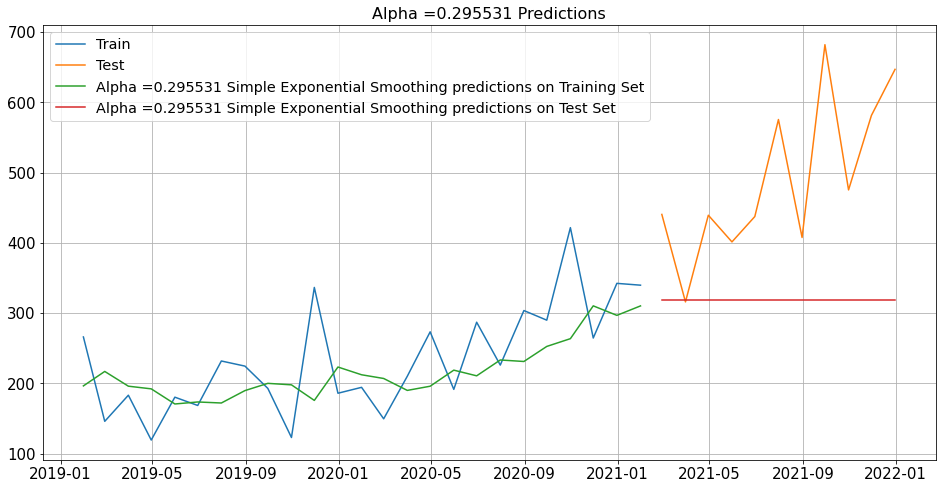

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['predict'], label='Alpha =0.295531 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.295531 Simple Exponential Smoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.295531 Predictions');

### Model Evaluation for  𝛼  = 0.295531 : Simple Exponential Smoothing

In [90]:
## Training Data RMSE and MAPE

rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict'],squared=False)
mape_model5_train_1 = MAPE(SES_train['Sales'],SES_train['predict'])
print("For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 65.268 MAPE is 22.02


In [91]:
## Test Data RMSE and MAPE

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict'],squared=False)
mape_model5_test_1 = MAPE(SES_test['Sales'],SES_test['predict'])
print("For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =0.295531 Simple Exponential Smoothing Model forecast on the Test Data,  RMSE is 203.707 MAPE is 35.18


In [92]:
resultsDf_5_1 = pd.DataFrame({'Model': 'Alpha=0.295531,SimpleExponentialSmoothing','Test RMSE': [rmse_model5_test_1],'Test MAPE': [mape_model5_test_1]}
                           ,index=['Model 5.1'])

resultsDf = pd.concat([resultsDf, resultsDf_5_1])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 5.1,"Alpha=0.295531,SimpleExponentialSmoothing",203.706532,35.18


Setting different alpha values.

Remember, the higher the alpha value more weightage is given to the more recent observation.
That means, what happened recently will happen again.

We will run a loop with different alpha values to understand which particular value works best for alpha on the test set.

In [93]:
    ## First we will define an empty dataframe to store our values from the loop

resultsDf_5_2 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_5_2

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [ ]:
for i in np.arange(0.01,1,0.01):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(SES_test))
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['predict',i],squared=False)
    mape_model5_train_i = MAPE(SES_train['Sales'],SES_train['predict',i])
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['predict',i],squared=False)
    mape_model5_test_i = MAPE(SES_test['Sales'],SES_test['predict',i])
    
    resultsDf_5_2 = resultsDf_5_2.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [95]:
resultsDf_5_2.sort_values(by = 'Test RMSE')

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
97,0.98,85.094219,28.66,186.451151,31.72
98,0.99,85.623340,28.91,186.454188,31.72
96,0.97,84.575352,28.41,186.459274,31.72
95,0.96,84.066488,28.18,186.477857,31.72
94,0.95,83.567388,27.96,186.506226,31.73
...,...,...,...,...,...
5,0.06,78.108756,27.31,256.546175,47.31
4,0.05,78.639887,27.86,258.587811,47.76
1,0.02,80.115498,29.19,258.898294,47.83
3,0.04,79.134854,28.37,259.877946,48.05


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


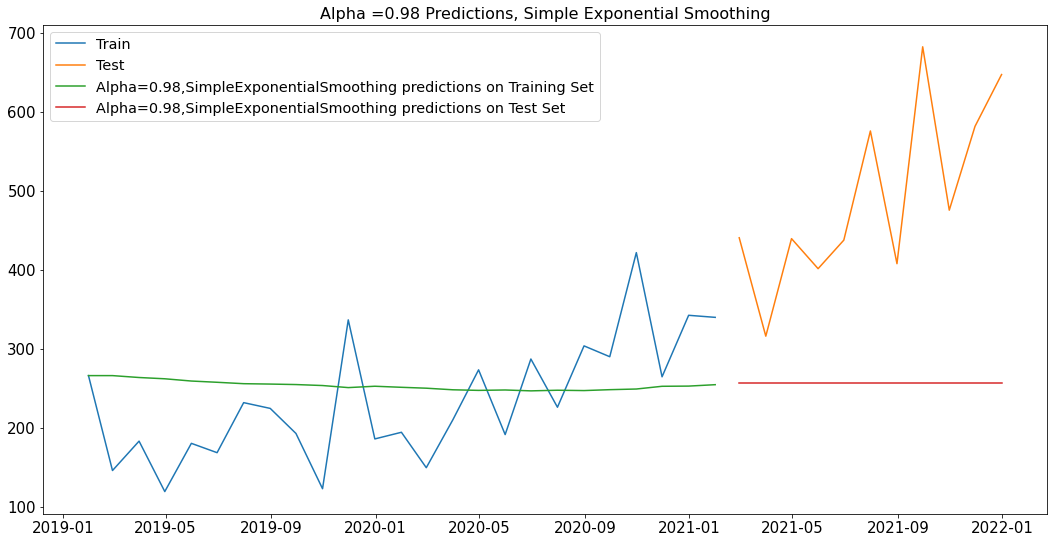

In [96]:
## Plotting on both the Training and Test data 
## Alpha=0.98,SimpleExponentialSmoothing

SES_train = train.copy()
SES_test = test.copy()

model_SES = SimpleExpSmoothing(SES_train['Sales'])

model_SES_fit = model_SES.fit(smoothing_level=0.02,optimized=False,use_brute=True)

SES_train['predict'] = model_SES_fit.fittedvalues
SES_test['predict'] = model_SES_fit.forecast(len(SES_test))


plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['predict'], label='Alpha=0.98,SimpleExponentialSmoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha=0.98,SimpleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha =0.98 Predictions, Simple Exponential Smoothing')


plt.grid();

In [97]:
resultsDf_5_3 = pd.DataFrame({'Model': ['Alpha=0.98,SimpleExponentialSmoothing'],
                                'Test RMSE': [resultsDf_5_2['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_5_2['Test MAPE'][1]]}
                           ,index=['Model 5.2'])

resultsDf = pd.concat([resultsDf, resultsDf_5_3])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 5.1,"Alpha=0.295531,SimpleExponentialSmoothing",203.706532,35.18
Model 5.2,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83


## Model 6: Double Exponential Smoothing (Holt's Model)

Two parameters  𝛼  and  𝛽  are estimated in this model. Level and Trend are accounted for in this model.

In [98]:
DES_train = train.copy()
DES_test = test.copy()

In [99]:
model_DES = Holt(DES_train['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [100]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [101]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.567169,True
smoothing_trend,beta,0.566905,True
initial_level,l.0,269.302830,True
initial_trend,b.0,-58.623990,True


In [102]:
test_predictions_model6 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model6.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2021-02-28    342.100702
2021-03-31    343.995263
2021-04-30    345.889824
2021-05-31    347.784385
2021-06-30    349.678946
Freq: M, dtype: float64

In [103]:
## Test Data - RMSE and MAPE

rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],test_predictions_model6,squared=False)
mape_model6_test = MAPE(DES_test['Sales'],test_predictions_model6)
print("For Alpha=0.0.526316,Beta=0.526316,DoubleExponentialSmoothing predictions on Test Set,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model6_test, mape_model6_test))

For Alpha=0.0.526316,Beta=0.526316,DoubleExponentialSmoothing predictions on Test Set,  RMSE is 174.382 MAPE is 29.46


In [104]:
resultsDf6_1 = pd.DataFrame({'Model': "Alpha=0.526316,Beta=0.526316:DoubleExponentialSmoothing",'Test RMSE': [rmse_model6_test],'Test MAPE': [mape_model6_test]}
                              ,index=['Model 6.1'])

resultsDf = pd.concat([resultsDf, resultsDf6_1])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 5.1,"Alpha=0.295531,SimpleExponentialSmoothing",203.706532,35.18
Model 5.2,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponential...",174.381518,29.46


#### Varying the values of Alpha and Beta to get check for lowest test RMSE

In [105]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6_2

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [ ]:
for i in np.arange(0.01,1.01,0.01):
    for j in np.arange(0.01,1.01,0.01):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        mape_model6_train = MAPE(DES_train['Sales'],DES_train['predict',i,j])
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        mape_model6_test = MAPE(DES_test['Sales'],DES_test['predict',i,j])
        
        resultsDf_6_2 = resultsDf_6_2.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [107]:
resultsDf_6_2

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.01,0.01,1627.596200,602.93,3575.491725,722.07
1,0.01,0.02,1617.936760,599.93,3527.712062,712.55
2,0.01,0.03,1608.330297,596.95,3480.311856,703.10
3,0.01,0.04,1598.776641,593.97,3433.289151,693.72
4,0.01,0.05,1589.275622,591.01,3386.641998,684.41
...,...,...,...,...,...,...
9995,1.00,0.96,152.668817,55.05,184.867404,31.42
9996,1.00,0.97,153.854308,55.51,188.903484,32.17
9997,1.00,0.98,155.059592,55.97,193.217850,32.96
9998,1.00,0.99,156.285190,56.45,197.822882,33.81


Let us sort the data frame in the ascending ordering of the 'Test RMSE' and the 'Test MAPE' values.

In [108]:
resultsDf_6_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
1767,0.18,0.68,130.675164,46.48,75.210387,13.06
1614,0.17,0.15,269.918916,98.48,75.212019,13.12
1669,0.17,0.70,134.931431,48.06,75.218918,13.01
1670,0.17,0.71,134.311527,47.82,75.257971,13.15
1573,0.16,0.74,138.485251,49.47,75.318106,13.16


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


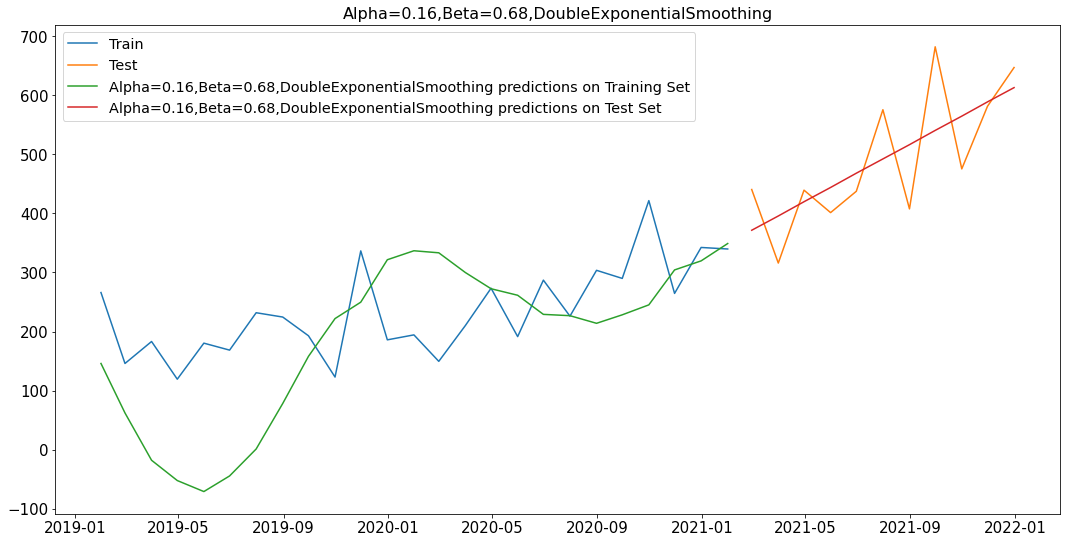

In [109]:
## Plotting on both the Training and Test data 
## Alpha=0.18,Beta=0.68,DoubleExponentialSmoothing

DES_train = train.copy()
DES_test = test.copy()

model_DES = Holt(DES_train['Sales'])

model_DES_fit = model_DES.fit(smoothing_level=0.18,smoothing_slope=0.68,optimized=False,use_brute=True)

DES_train['predict'] = model_DES_fit.fittedvalues
DES_test['predict'] = model_DES_fit.forecast(steps=55)


plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict'], label='Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict'], label='Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing')


plt.grid();

In [110]:
resultsDf_6_3 = pd.DataFrame({'Model': 'Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing','Test RMSE': [resultsDf_6_2['Test RMSE'][1767]],'Test MAPE':[resultsDf_6_2['Test MAPE'][1767]]}
                       ,index=['Model 6.2'])




resultsDf = pd.concat([resultsDf, resultsDf_6_3])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 5.1,"Alpha=0.295531,SimpleExponentialSmoothing",203.706532,35.18
Model 5.2,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponential...",174.381518,29.46


## Model 7: Triple Exponential Smoothing (Holt - Winter's Model)

##### Three parameters $\alpha$, $\beta$ and $\gamma$ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.

In [111]:
TES_train = train.copy()
TES_test = test.copy()

In [112]:
model_TES = ExponentialSmoothing(TES_train['Sales'],trend='additive',seasonal='multiplicative',freq='M')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [113]:
model_TES_autofit = model_TES.fit()

The above fit of the model is by the best parameters that Python thinks for the model. It uses a brute force method to choose the parameters.

In [114]:
model_TES_autofit.params

{'smoothing_level': 0.0004929164306892388,
 'smoothing_trend': 5.195419570963339e-07,
 'smoothing_seasonal': 0.0058100312184765565,
 'damping_trend': nan,
 'initial_level': 182.8182983314436,
 'initial_trend': 6.338199091537811,
 'initial_seasons': array([0.97744312, 0.6171173 , 0.80812394, 0.82624059, 0.72262518,
        0.8943246 , 0.84390637, 0.97365879, 0.87621856, 1.01080264,
        1.000398  , 0.90861401]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [115]:
## Prediction on the training data

TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Sales,auto_predict
Time_Stamp,,
2019-01-31,266.0,184.889718
2019-02-28,145.9,120.668400
2019-03-31,183.1,163.155337
2019-04-30,119.3,172.059908
2019-05-31,180.3,155.039985


In [116]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=11)
TES_test.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Sales,auto_predict
Time_Stamp,,
2021-02-28,440.4,214.644458
2021-03-31,315.9,286.133817
2021-04-30,439.3,297.444356
2021-05-31,401.3,265.049671
2021-06-30,437.4,333.428535


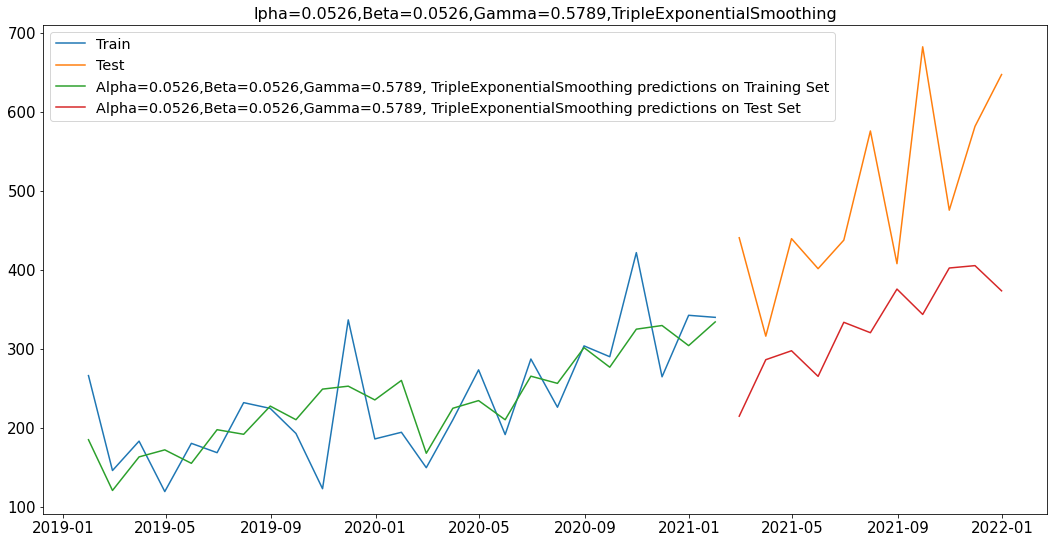

In [117]:
## Plotting on both the Training and Test using autofit
## lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')


plt.plot(TES_train['auto_predict'], label='Alpha=0.0526,Beta=0.0526,Gamma=0.5789, TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['auto_predict'], label='Alpha=0.0526,Beta=0.0526,Gamma=0.5789, TripleExponentialSmoothing predictions on Test Set')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing')


plt.grid();

In [118]:
## Training Data

rmse_model7_train_1 = metrics.mean_squared_error(TES_train['Sales'],TES_train['auto_predict'],squared=False)
mape_model7_train_1 = MAPE(TES_train['Sales'],TES_train['auto_predict'])
print("For lpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_train_1, mape_model7_train_1))


For lpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Training Data,  RMSE is 50.008 MAPE is 16.79


In [119]:
## Test Data

rmse_model7_test_1 = metrics.mean_squared_error(TES_test['Sales'],TES_test['auto_predict'],squared=False)
mape_model7_test_1 = MAPE(TES_test['Sales'],TES_test['auto_predict'])
print("For lpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model7_test_1, mape_model7_test_1))

For lpha=0.0526,Beta=0.0526,Gamma=0.5789, Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 189.124 MAPE is 33.07


In [120]:
resultsDf_7_1 = pd.DataFrame({'Model': ' lpha=0.0526,Beta=0.0526,Gamma=0.5789,TripleExponentialSmoothing','Test RMSE': [rmse_model7_test_1],'Test MAPE':[mape_model7_test_1]}
                           ,index=['Model 7.1'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 5.1,"Alpha=0.295531,SimpleExponentialSmoothing",203.706532,35.18
Model 5.2,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponential...",174.381518,29.46


#### Varying the values of alpha, beta and gamma

In [128]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [ ]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=11)
        
            rmse_model7_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            mape_model7_train = MAPE(TES_train['Sales'],TES_train['predict',i,j,k])
        
            rmse_model7_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict',i,j,k],squared=False)
            mape_model7_test = MAPE(TES_test['Sales'],TES_test['predict',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model7_train
                                      ,'Train MAPE': mape_model7_train,'Test RMSE':rmse_model7_test
                                      ,'Test MAPE':mape_model7_test}, ignore_index=True)

In [130]:
resultsDf_7_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.0,0.0,0.0,86.339974,25.46,211.332768,36.07
1,0.0,0.0,0.1,85.246873,25.05,210.069875,36.78
2,0.0,0.0,0.2,84.387500,24.64,209.209982,37.32
3,0.0,0.0,0.3,83.764884,24.23,208.659960,37.69
4,0.0,0.0,0.4,83.380184,24.19,208.338169,37.89
...,...,...,...,...,...,...,...
1326,1.0,1.0,0.6,371.575990,75.28,604.023096,110.58
1327,1.0,1.0,0.7,370.928089,74.91,552.076935,101.96
1328,1.0,1.0,0.8,370.332462,74.54,565.968742,94.99
1329,1.0,1.0,0.9,369.787332,74.19,688.077000,101.41


In [131]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
181,0.1,0.5,0.5,100.754055,22.71,103.156504,18.10
170,0.1,0.4,0.5,96.423101,22.47,103.220298,18.17
192,0.1,0.6,0.5,105.147076,23.46,103.930131,18.15
180,0.1,0.5,0.4,101.026354,22.86,105.397481,18.11
191,0.1,0.6,0.4,105.404268,23.60,105.683525,17.80


In [132]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
214,0.1,0.8,0.5,112.833844,25.24,114.142977,17.51
191,0.1,0.6,0.4,105.404268,23.60,105.683525,17.80
203,0.1,0.7,0.5,109.251756,24.33,106.585697,17.82
202,0.1,0.7,0.4,109.491445,24.43,107.566674,17.89
181,0.1,0.5,0.5,100.754055,22.71,103.156504,18.10


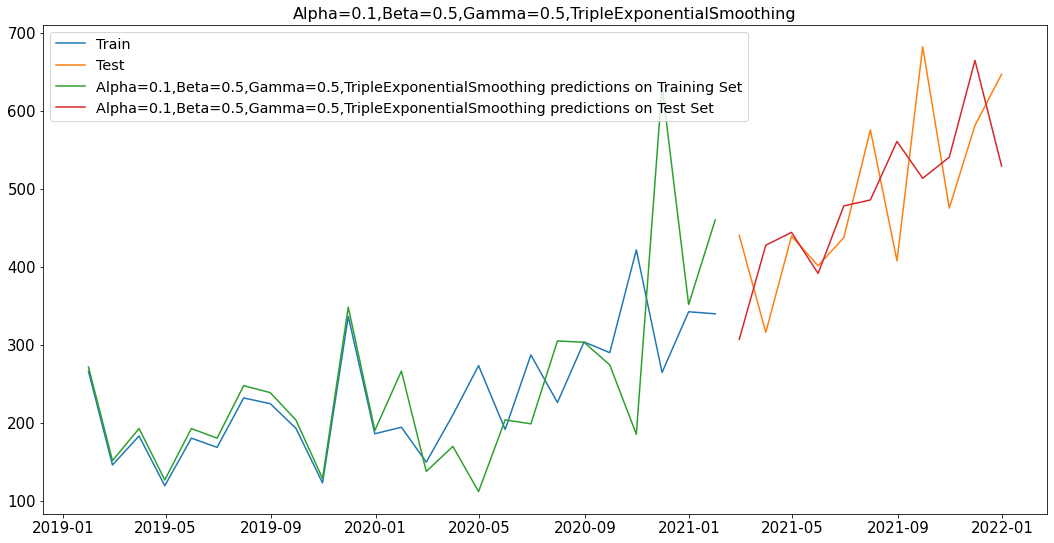

In [133]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination
#Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['predict', 0.1, 0.5, 0.5], label='Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set')
#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.1, 0.5, 0.5], label='Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing')
plt.grid();

In [134]:
resultsDf_7_3 = pd.DataFrame({'Model': 'Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing','Test RMSE': [resultsDf_7_2['Test RMSE'][181]],'Test MAPE':[resultsDf_7_2['Test MAPE'][181]]}
                           ,index=['Model 7.2'])

resultsDf = pd.concat([resultsDf, resultsDf_7_3])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 5.1,"Alpha=0.295531,SimpleExponentialSmoothing",203.706532,35.18
Model 5.2,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponential...",174.381518,29.46


# 6. Checking for the stationarity of the data at alpha = 0.05.

In [ ]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

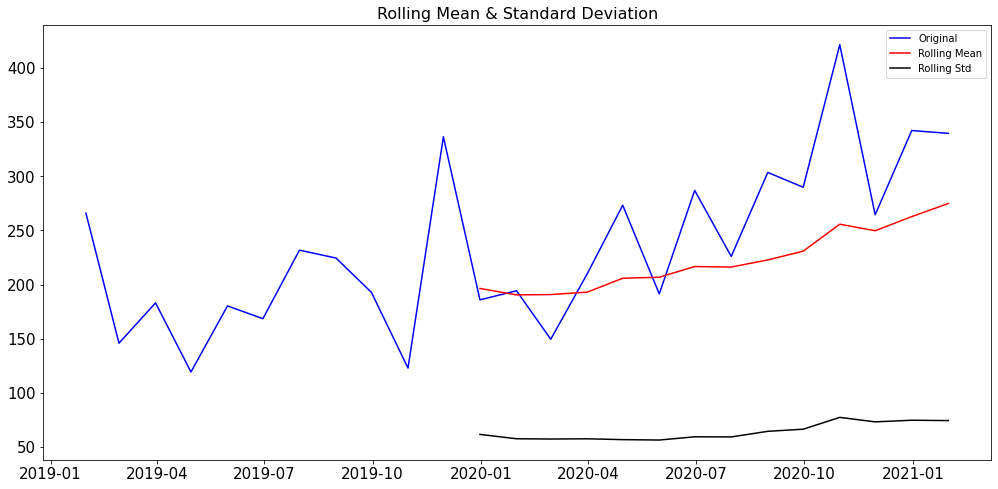

Results of Dickey-Fuller Test:
Test Statistic                 -1.085206
p-value                         0.720935
#Lags Used                      1.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64 



In [169]:
test_stationarity(train['Sales'])

We see that at 5% significant level the Time Series is non-stationary.

Let us take a difference of order 1 and check whether the Time Series is stationary or not.



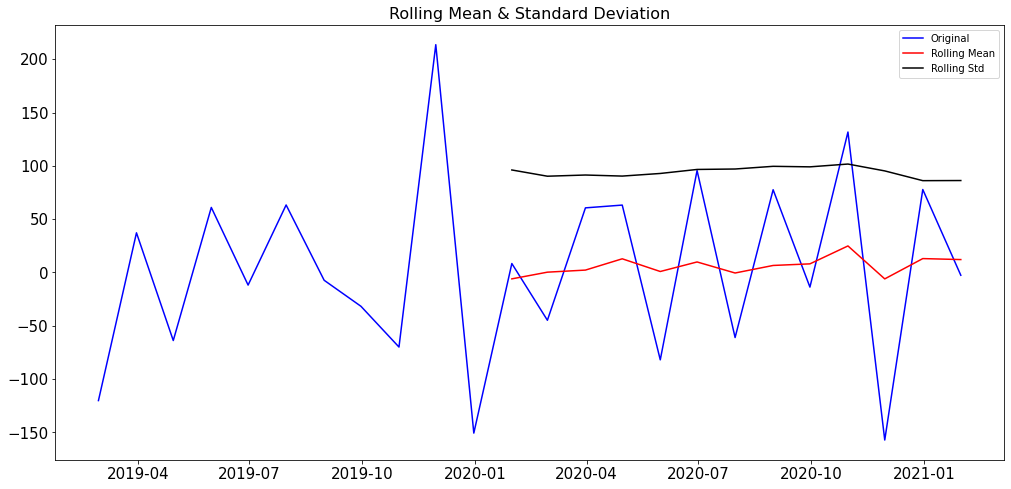

Results of Dickey-Fuller Test:
Test Statistic                -1.051192e+01
p-value                        1.019266e-18
#Lags Used                     0.000000e+00
Number of Observations Used    2.300000e+01
Critical Value (1%)           -3.752928e+00
Critical Value (5%)           -2.998500e+00
Critical Value (10%)          -2.638967e+00
dtype: float64 



In [170]:
test_stationarity(train['Sales'].diff().dropna())

We see that at  𝛼  = 0.05 the Time Series is indeed stationary

In [171]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

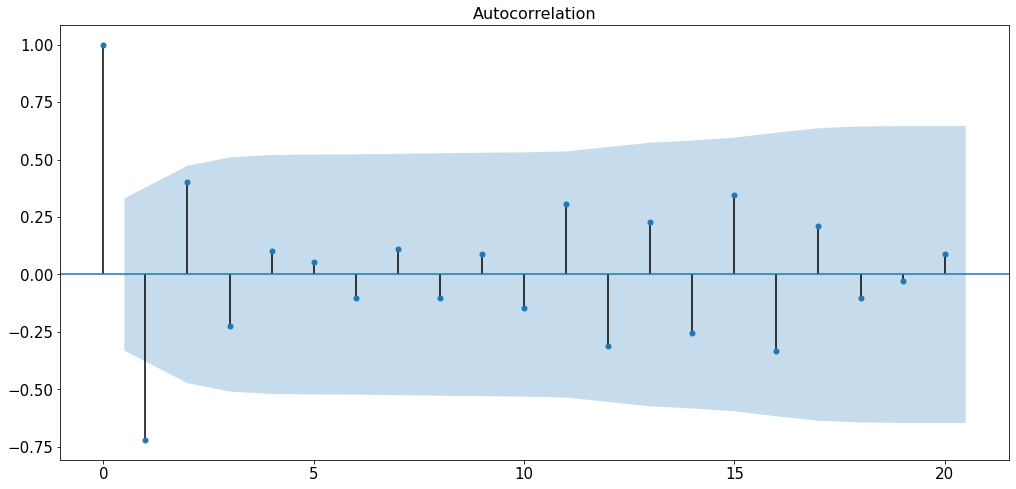

In [172]:
plot_acf(df_final['Sales'].diff().dropna(),lags=20)
plt.show()

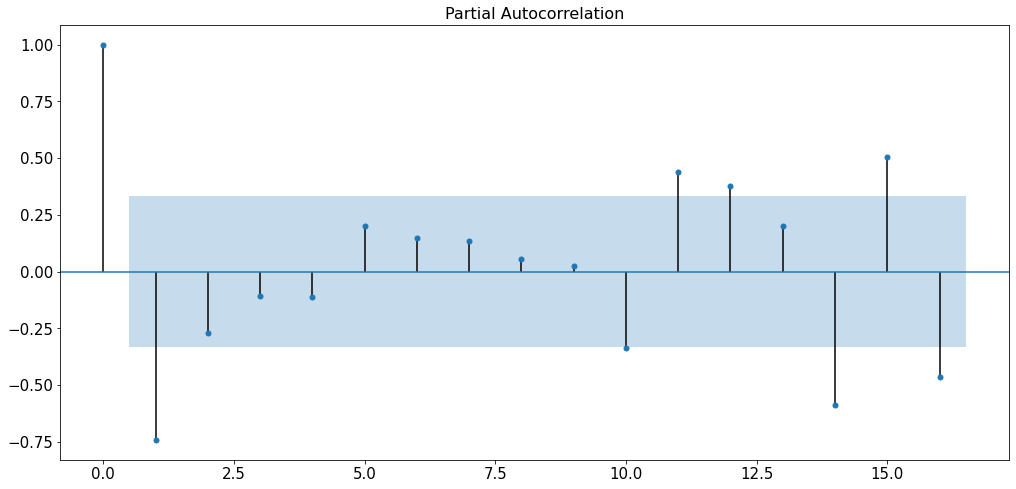

In [174]:
plot_pacf(df_final['Sales'].diff().dropna(),lags=16)
plt.show()

# 7. Building an automated version of the ARIMA

## Model 8: Automated ARIMA model

In [136]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p =  range(0, 3)
q = range(0, 2)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (2, 1, 0)
Model: (2, 1, 1)


In [137]:
ARIMA_train = train.copy()
ARIMA_test = test.copy()

In [138]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [139]:
## Let's start by building ARIMA model -- Although the data set has some seasonality and hence ARIMA is 
## not the right option Reason for making the model is to understand how different the model could be if seasonality is not considered

from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(ARIMA_train['Sales'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


ARIMA(0, 1, 0) - AIC:286.9590403488371
ARIMA(0, 1, 1) - AIC:272.34224852178124
ARIMA(1, 1, 0) - AIC:275.5242890911195
ARIMA(1, 1, 1) - AIC:273.2637039532103
ARIMA(2, 1, 0) - AIC:276.6473269421822
ARIMA(2, 1, 1) - AIC:274.52301441564816


In [140]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
1,"(0, 1, 1)",272.342249
3,"(1, 1, 1)",273.263704
5,"(2, 1, 1)",274.523014
2,"(1, 1, 0)",275.524289
4,"(2, 1, 0)",276.647327
0,"(0, 1, 0)",286.959040


In [141]:
## ARIMA(0,1,1) has the lowest AIC
mod = ARIMA(ARIMA_train['Sales'], order=(0,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   24
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -133.171
Method:                       css-mle   S.D. of innovations             58.144
Date:                Mon, 03 Oct 2022   AIC                            272.342
Time:                        06:34:43   BIC                            275.876
Sample:                    02-28-2019   HQIC                           273.280
                         - 01-31-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.7970      1.612      4.215      0.000       3.637       9.957
ma.L1.D.Sales    -0.9998      0.163     -6.138      0.000      -1.319      -0.680
                                    Root

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be use

In [142]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA[0]

array([321.39068913, 328.18769016, 334.98469119, 341.78169223,
       348.57869326, 355.37569429, 362.17269533, 368.96969636,
       375.76669739, 382.56369843, 389.36069946])

In [143]:
#Test data RMSE and MAPE
from math import sqrt
from sklearn.metrics import  mean_squared_error
RMSE_autoARIMA = sqrt(mean_squared_error(ARIMA_test.Sales,predicted_autoARIMA[0]))
MAPE_autoARIMA = MAPE(ARIMA_test.Sales,predicted_autoARIMA[0])


print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 165.38202296771584 
MAPE for the autofit ARIMA model: 28.1


In [144]:
resultsDf_8 = pd.DataFrame({'Model':'autoARIMA(0,1,1)', 'Test RMSE': RMSE_autoARIMA,'Test MAPE': MAPE_autoARIMA }
                           ,index=['Model 8'])

resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 5.1,"Alpha=0.295531,SimpleExponentialSmoothing",203.706532,35.18
Model 5.2,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponential...",174.381518,29.46


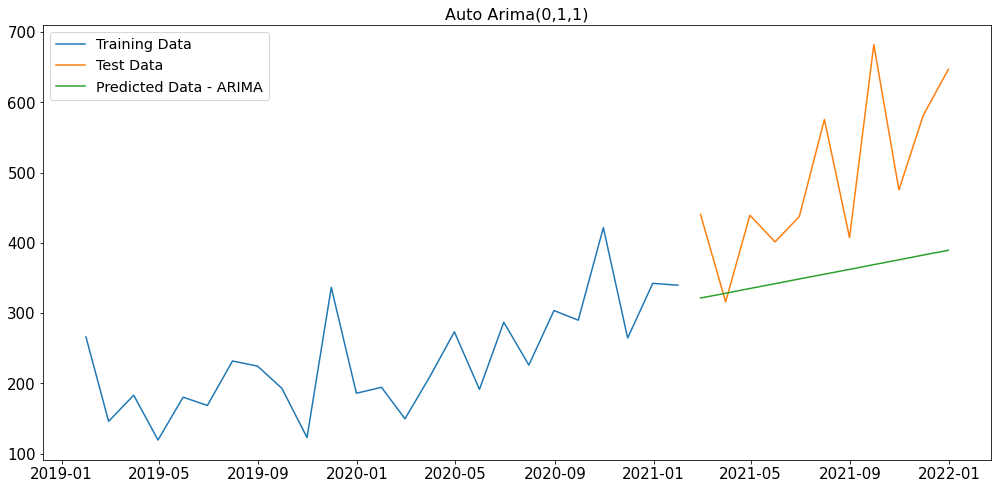

In [145]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_autoARIMA[0],label='Predicted Data - ARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Auto Arima(0,1,1)')
plt.grid();

In [146]:
## RMSE has reduced in comparison to ARIMA when seasonality was introduced

# 8. Building ARIMA models based on the cut-off points of ACF and PACF on the training data

In [147]:
#### Checking the stationarity of the train data

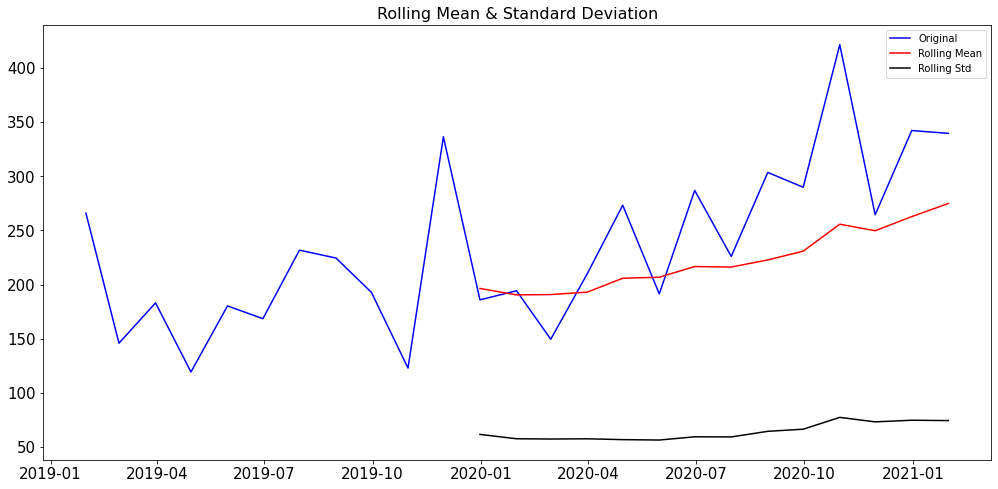

Results of Dickey-Fuller Test:
Test Statistic                 -1.085206
p-value                         0.720935
#Lags Used                      1.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64 



In [148]:
test_stationarity(train['Sales'])

We see that the series is not stationary at  𝛼  = 0.05.

#### Taking first differencing and checking the stationarity again

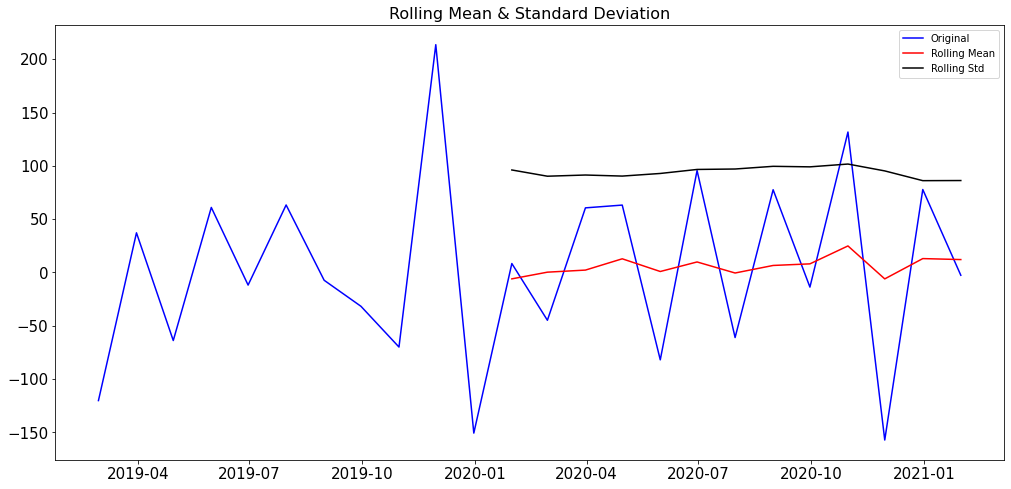

Results of Dickey-Fuller Test:
Test Statistic                -1.051192e+01
p-value                        1.019266e-18
#Lags Used                     0.000000e+00
Number of Observations Used    2.300000e+01
Critical Value (1%)           -3.752928e+00
Critical Value (5%)           -2.998500e+00
Critical Value (10%)          -2.638967e+00
dtype: float64 



In [149]:
test_stationarity(train['Sales'].diff().dropna())

We see that the after first differencing the series is stationary at 𝛼 = 0.05.

#### Let us look at the ACF and PACF plots on the training data.

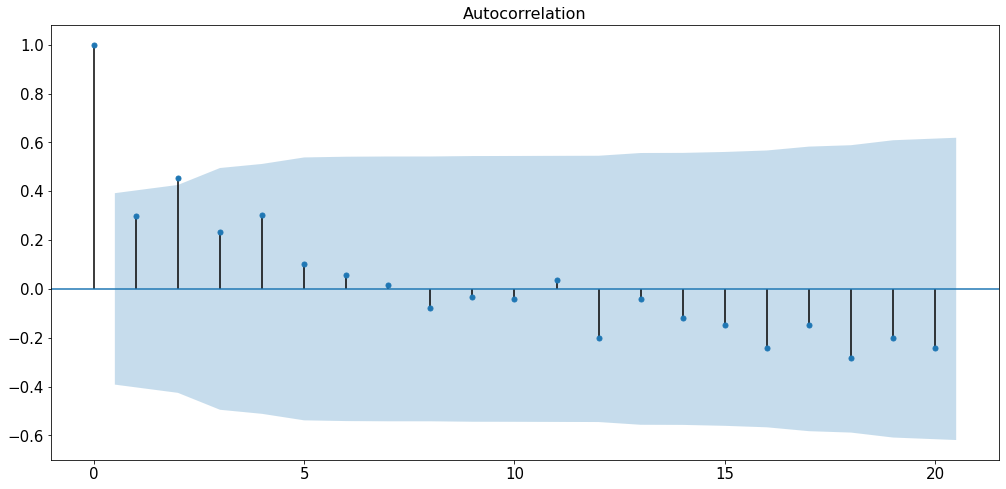

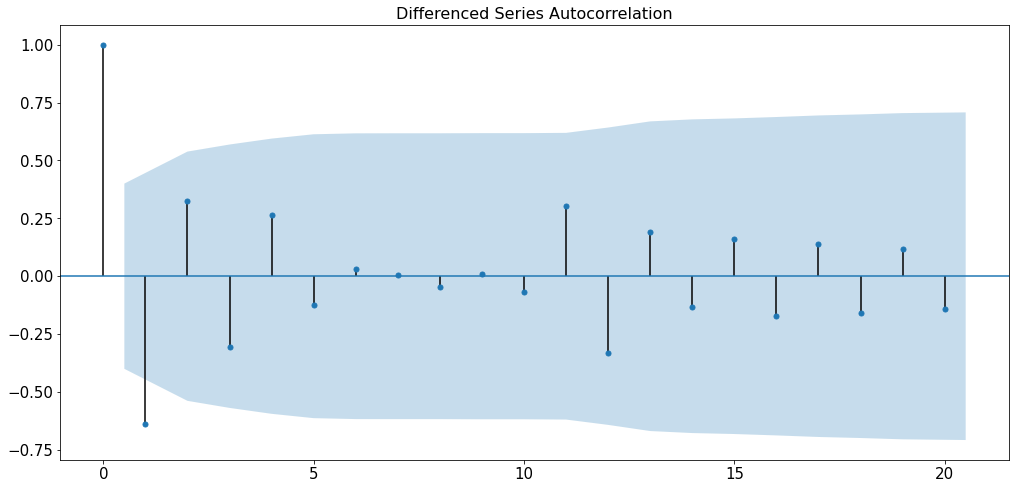

In [150]:
#ACF Plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train['Sales'],lags=20)
plot_acf(train['Sales'].diff().dropna(),lags=20,title='Differenced Series Autocorrelation')
plt.show()

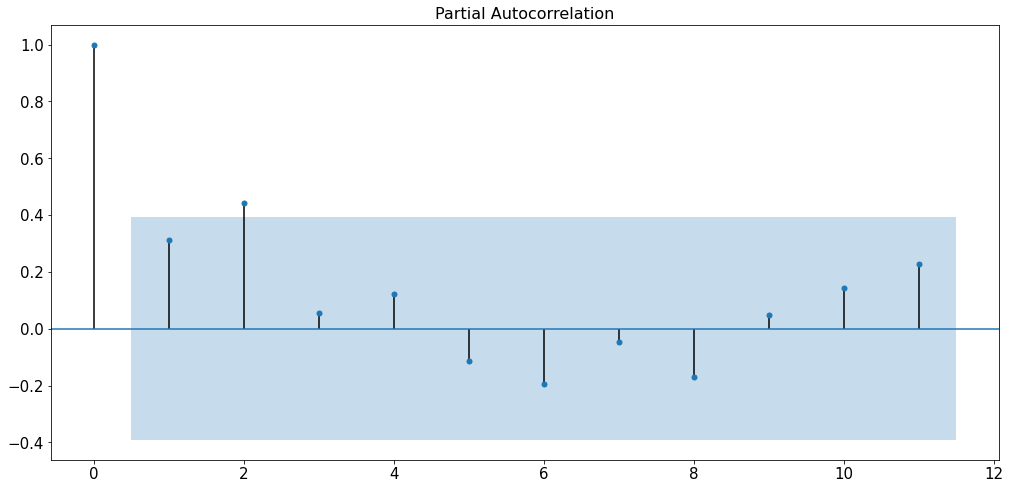

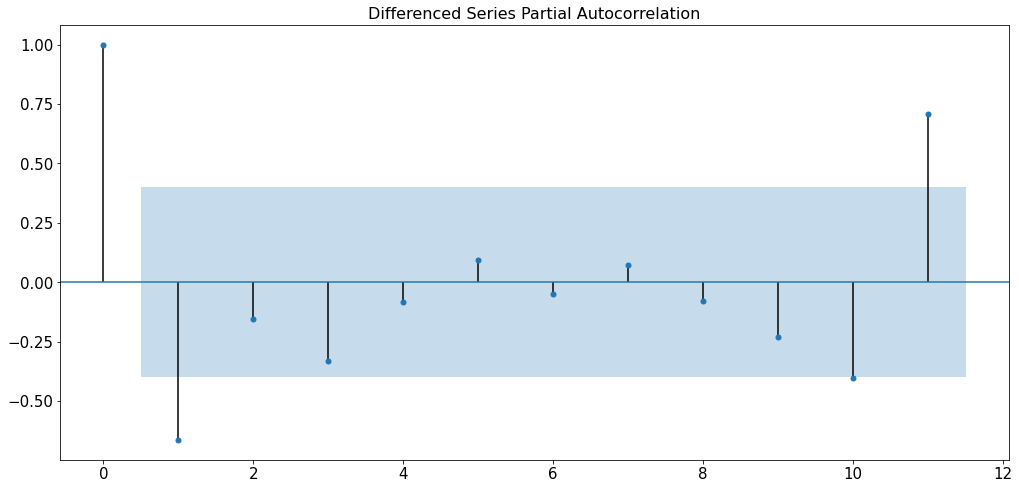

In [178]:
#PACF Plot
plot_pacf(train['Sales'],lags=11)
plot_pacf(train['Sales'].diff().dropna(),lags=11,title='Differenced Series Partial Autocorrelation')
plt.show()



## Model 9 - ARIMA from acf and pacf plot

In [152]:
#Building the model
from statsmodels.tsa.arima_model import ARIMA

ARIMA_mod = ARIMA(train['Sales'], order=(2,1,2))

results_ARIMA_mod  = ARIMA_mod.fit()

print(results_ARIMA_mod.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   24
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -132.014
Method:                       css-mle   S.D. of innovations             55.117
Date:                Mon, 03 Oct 2022   AIC                            276.028
Time:                        06:35:30   BIC                            283.096
Sample:                    02-28-2019   HQIC                           277.903
                         - 01-31-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.9602      1.496      4.654      0.000       4.029       9.892
ar.L1.D.Sales    -0.6811      0.519     -1.313      0.189      -1.698       0.336
ar.L2.D.Sales     0.0977      0.284     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be use

In [156]:
predicted_acf_pacf_ARIMA = results_ARIMA_mod.forecast(steps=len(test))

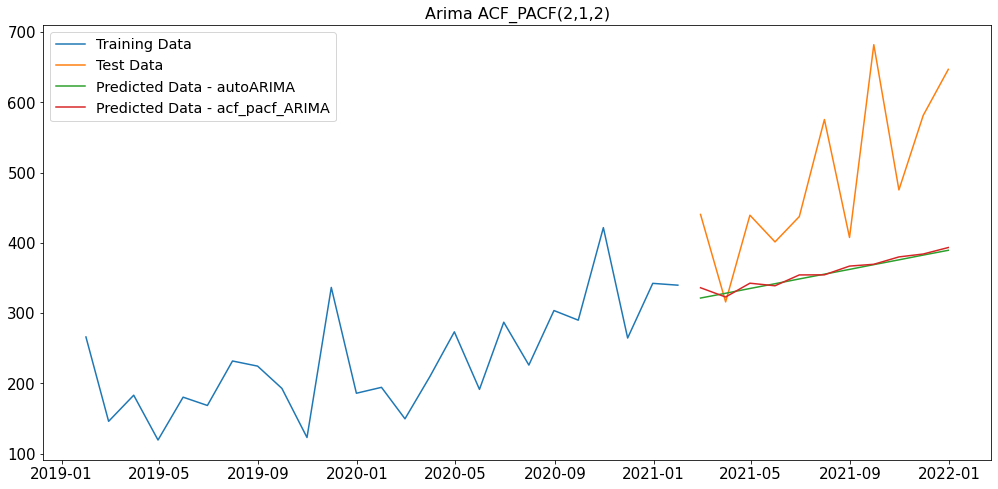

In [157]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_autoARIMA[0],label='Predicted Data - autoARIMA')
plt.plot(test.index,predicted_acf_pacf_ARIMA[0],label='Predicted Data - acf_pacf_ARIMA')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Arima ACF_PACF(2,1,2)')
plt.grid();

In [158]:
## Test Data - RMSE and MAPE

rmse_model10_test = metrics.mean_squared_error(test['Sales'],predicted_acf_pacf_ARIMA[0],squared=False)
mape_model10_test = MAPE(test['Sales'],predicted_acf_pacf_ARIMA[0])
print("For ARIMA on the Test Data,  RMSE is %3.3f and MAPE is %3.2f" %(rmse_model10_test, mape_model10_test))

For ARIMA on the Test Data,  RMSE is 162.828 and MAPE is 27.29


In [159]:
resultsDf_10 = pd.DataFrame({'Model': 'acf_pacf_ARIMA(2,1,2)','Test RMSE': [rmse_model10_test],'Test MAPE': [mape_model10_test]},index=['Model 9'])

resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

,Model,Test RMSE,Test MAPE
Model 1,RegressionOnTime,164.563291,27.94
Model 2,NaiveModel,186.469115,31.72
Model 3,SimpleAverage,279.195549,52.35
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 5.1,"Alpha=0.295531,SimpleExponentialSmoothing",203.706532,35.18
Model 5.2,"Alpha=0.98,SimpleExponentialSmoothing",258.898294,47.83
Model 6.1,"Alpha=0.526316,Beta=0.526316:DoubleExponential...",174.381518,29.46


# 9. Based on the model-building exercise, building the most optimum model on the complete data and predict 6 months into the future with 95% confidence interval

#### Sorting the models based on 'Test RMSE'


In [160]:
pd.options.display.max_colwidth = 100
resultsDf.sort_values(by = 'Test RMSE')

,Model,Test RMSE,Test MAPE
Model 4.1,2pointTrailingMovingAverage,71.420194,12.78
Model 6.2,"Alpha=0.16,Beta=0.68,DoubleExponentialSmoothing",75.210387,13.06
Model 4.2,4pointTrailingMovingAverage,75.513759,13.05
Model 4.3,6pointTrailingMovingAverage,88.575544,14.62
Model 7.2,"Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",103.156504,18.10
Model 7.2,"Alpha=0.1,Beta=0.5,Gamma=0.5,TripleExponentialSmoothing",103.156504,18.10
Model 4.4,9pointTrailingMovingAverage,113.259927,18.07
Model 9,"acf_pacf_ARIMA(2,1,2)",162.827976,27.29
Model 1,RegressionOnTime,164.563291,27.94
Model 8,"autoARIMA(0,1,1)",165.382023,28.10


## Full Model - Double Exponential Smoothing

In [161]:
model_DES_full = Holt(df_final['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [162]:
fullmodel1 = model_DES_full.fit(smoothing_level=0.16,smoothing_slope=0.68,optimized=False,use_brute=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  """Entry point for launching an IPython kernel.


In [163]:
RMSE_fullmodel1 = metrics.mean_squared_error(df_final['Sales'],fullmodel1.fittedvalues,squared=False)
MAPE_fullmodel1 = MAPE(df_final['Sales'],fullmodel1.fittedvalues)

print('Full_Model_DES (Alpha: 0.16,Beta: 0.68): RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

Full_Model_DES (Alpha: 0.16,Beta: 0.68): RMSE: 127.59598774673321 
MAPE: 33.52


In [164]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=6)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


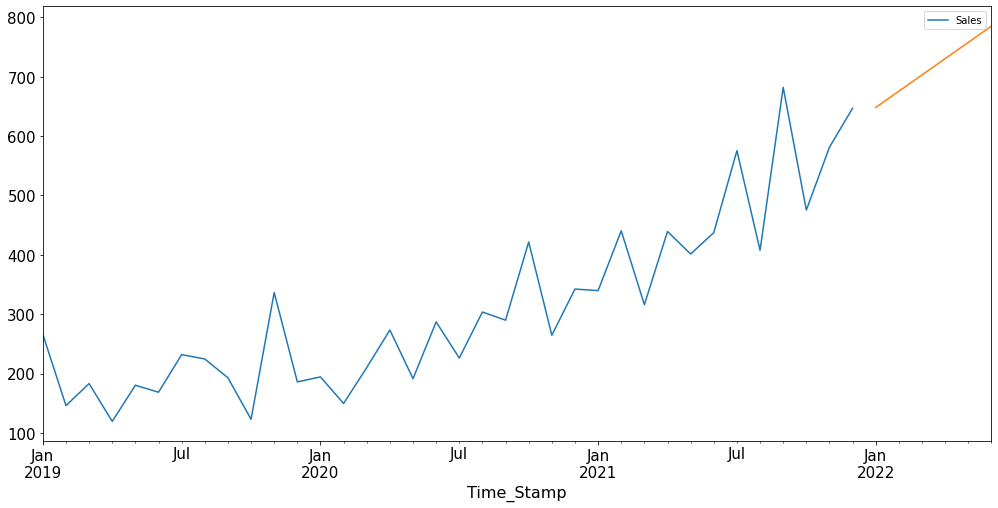

In [165]:
df_final.plot()
prediction_1.plot();

In [166]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#The percentile function under numpy lets us calculate these and adding and subtracting from the predictions
#gives us the necessary confidence bands for the predictions
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_1_df.head()

,lower_CI,prediction,upper_ci
2022-01-31,-3.427161,648.205033,1430.069344
2022-02-28,23.990127,675.622321,1457.486632
2022-03-31,51.407415,703.039609,1484.903920
2022-04-30,78.824703,730.456897,1512.321208
2022-05-31,106.241991,757.874185,1539.738496


Text(0.5, 1.0, 'Triple Exponential Smoothing 0.4,0.1,0.2')

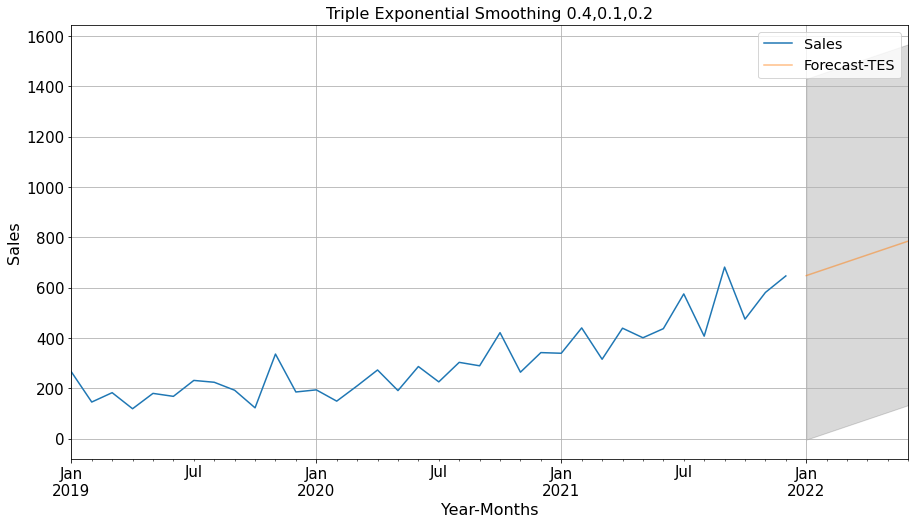

In [167]:
# plot the forecast along with the confidence band

axis = df_final.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast-TES', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.legend(loc = 'best')
plt.legend(fontsize="x-large")
plt.grid()
plt.title('Triple Exponential Smoothing 0.4,0.1,0.2')